In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [9]:
import filter_utils as filt

In [10]:
data_dir = "./data/"
data_fn = data_dir + "cleaned_data.txt"
data_grey_fn = data_dir + "cleaned_grey_values.txt"

In [11]:
all_elements = pd.read_csv(data_fn)
print(all_elements.head())

   Distance (um)  Elapsed Time   B11_ppm  Na23_ppm  Mg25_ppm  Al27_ppm  \
0      -1.483983     -1.483983 -0.000987 -1.739987  1.252779 -1.428722   
1      -1.478071     -1.478071  0.273978 -0.963147  2.358353 -1.189735   
2      -1.472164     -1.472164 -0.041514 -1.274842  1.587131 -0.879393   
3      -1.466252     -1.466252  0.646814 -0.961113  1.437627 -1.582681   
4      -1.460344     -1.460344  0.151465 -1.214546  1.474992 -1.570397   

   Si28_ppm   P31_ppm   S34_ppm  Cl35_ppm  ...  Zn66_ppm  Zn68_ppm  Sr88_ppm  \
0 -1.030042  1.095407  0.576121 -1.078462  ...  1.409131  1.572304  1.231484   
1 -0.483173  1.588047  1.585102 -1.104329  ...  1.439062  1.372410  0.979279   
2 -0.694485  1.389658  0.317097 -0.880657  ...  1.674240  1.736563  0.941318   
3 -1.052700  1.525399 -0.236500 -1.136729  ...  1.628649  1.488895 -0.189878   
4 -1.296695  1.237596 -0.067184 -1.486543  ...  1.335298  1.297910  0.958900   

   Ba138_ppm  PbTotal_ppm     pixel  new_distance  new_pixel  case  sex  


In [12]:
grey_values = pd.read_csv(data_grey_fn)
print(grey_values)

      Distance_(pixels)  Gray_Value  new_pixel  case  cleaned_grey sex
0                   432    126.7965          0    43      4.842583   M
1                   433    126.2878          1    43      4.838563   M
2                   434    123.3846          2    43      4.815306   M
3                   435    120.0393          3    43      4.787819   M
4                   436    118.5882          4    43      4.775657   M
...                 ...         ...        ...   ...           ...  ..
5678               1746    104.8251       1480    56      4.631919   F
5679               1747    104.6929       1481    56      4.631425   F
5680               1748    103.3024       1482    56      4.637661   F
5681               1749    101.6086       1483    56      4.621128   F
5682               1750    101.0000       1484    56      4.615121   F

[5683 rows x 6 columns]


In [39]:
elt_name = "S34_ppm" # "Sr88_ppm" # "Mg25_ppm" # "Cu65_ppm" # "Zn66_ppm" # 
elt_array = [
    all_elements[all_elements['case']==i][elt_name] for i in [43,44,55,56]
]
print([len(arr) for arr in elt_array])

[461, 320, 570, 711]


4.605170185988092
i=0, px=1.0
i=1, px=0.8
i=2, px=0.6400000000000001
i=3, px=0.5120000000000001
i=4, px=0.4096000000000001
i=5, px=0.3276800000000001
i=6, px=0.2621440000000001
i=7, px=0.20971520000000007
i=8, px=0.1677721600000001
i=9, px=0.13421772800000006
i=10, px=0.10737418240000006
i=11, px=0.08589934592000005
i=12, px=0.06871947673600004
i=13, px=0.054975581388800036
i=14, px=0.043980465111040035
i=15, px=0.03518437208883203
i=16, px=0.028147497671065624
i=17, px=0.022517998136852502
i=18, px=0.018014398509482003
i=19, px=0.014411518807585602
i=20, px=0.011529215046068483
i=21, px=0.009223372036854787
i=22, px=0.00737869762948383
i=23, px=0.005902958103587064
i=24, px=0.004722366482869652
i=25, px=0.0037778931862957215
i=26, px=0.0030223145490365774
i=27, px=0.002417851639229262
i=28, px=0.0019342813113834097
i=29, px=0.0015474250491067279
i=30, px=0.0012379400392853823
i=31, px=0.0009903520314283058
i=32, px=0.0007922816251426448
i=33, px=0.0006338253001141158
i=34, px=0.000507

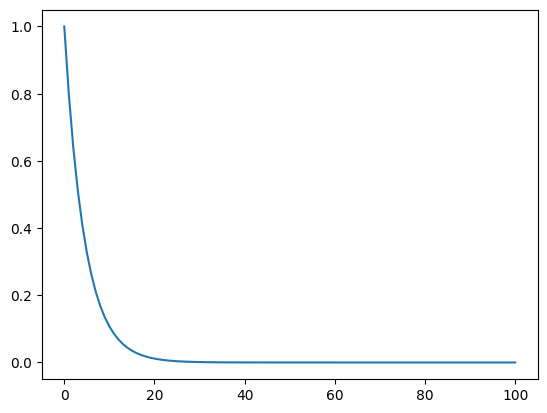

In [ ]:
bandwidth = 100
def prior(x: np.ndarray) -> np.ndarray:
    # Find the idx of the max True element.
    # This is the index of the highest frequency basis function included.
    # This is a proxy for age since age is the number of peaks which is
    # at most the frequency of the highest frequency basis function.
    for i in range(len(x)-1, -1, -1):
        if x[i]:
            break
    # Assume that the mortality rate is 20% per year => prior prob of age i is 0.8^i.
    return 0.8**i # no need to normalize since we only care about relative values.

# threshold = 2*np.log(10**0.5) # Substantial difference between models required to pick the more complex one.
threshold = 2*np.log(10**1) # Strong difference between models required to pick the more complex one.
print(threshold)

criterion = "bic" # "aic" or "bic"
mode = "forward" # "forward" or "backward"

xi = range(0, bandwidth+1)
xv = np.eye(bandwidth+1)
px = [prior(xv[i]) for i in range(len(xv))]
for i in range(len(px)):
    print(f"i={i}, px={px[i]}")
p = plt.figure()
p = plt.plot(xi, px)
p = plt.show()

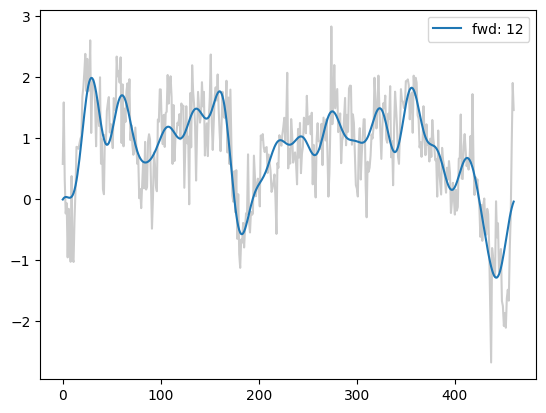

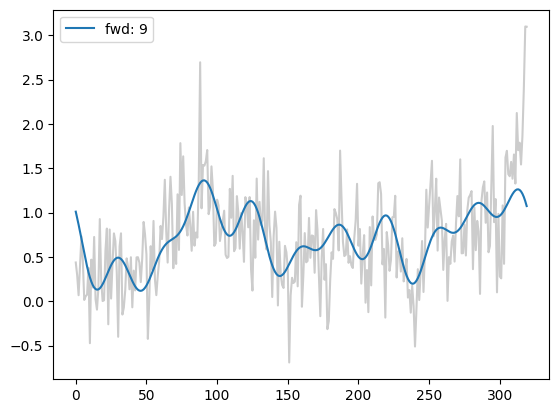

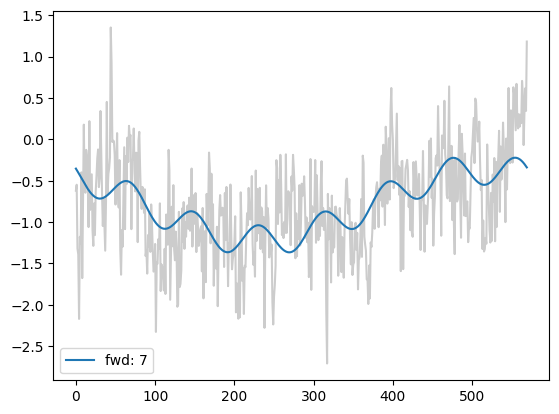

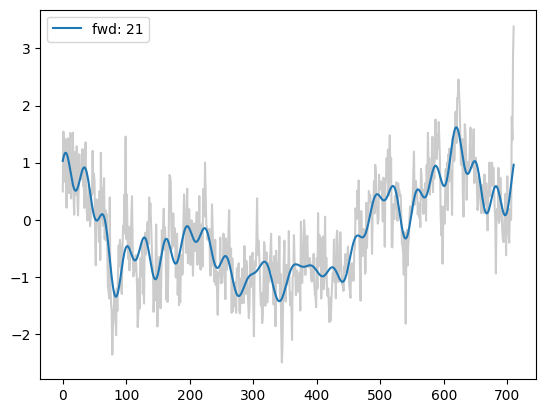

In [98]:
plts = []
fwd_yr_lens_array = []
bkwd_yr_lens_array = []
for i in range(len(elt_array)):
    elt = np.asarray(elt_array[i])
    fwd_count, fwd_locations, fwd_smoothed = filt.age_shark(
        elt, bandwidth, mode, threshold, criterion, prior
    )
    # bkwd_count, bkwd_locations, bkwd_smoothed = filt.age_shark(
    #     elt, bandwidth, "backward",
    # )

    p = plt.figure()
    p = plt.plot(range(len(elt)), elt, color="grey", alpha=0.4)
    p = plt.plot(fwd_smoothed, label=f"fwd: {fwd_count}")
    # p = plt.plot(bkwd_smoothed, label=f"bkwd: {bkwd_count}")
    p = plt.legend()
    
    plts.append(p)

In [ ]:
grey_array = [
    grey_values[grey_values['case']==i]['cleaned_grey'] for i in [43,44,55,56]
]
plts = []
for i in range(len(grey_array)):
    grey_val = np.asarray(grey_array[i])
    fwd_count, fwd_locations, fwd_smoothed = filt.age_shark(
        grey_val, bandwidth, "forward",
    )
    bkwd_count, bkwd_locations, bkwd_smoothed = filt.age_shark(
        grey_val, bandwidth, "backward",
    )

    p = plt.figure()
    p = plt.plot(range(len(grey_val)), grey_val, color="grey", alpha=0.4)
    p = plt.plot(fwd_smoothed, label=f"fwd: {fwd_count}")
    p = plt.plot(bkwd_smoothed, label=f"bkwd: {bkwd_count}")
    p = plt.legend()
    
    plts.append(p)

In [ ]:
(elt_array[0])